In [ ]:
#이전작업을 여기서
#그리드에 사고 데이터 넣기

In [1]:
from geopandas.tools import sjoin


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json

import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

#import pydeck as pdk
#import shapefile
import os
import re
import seaborn as sns

#import mapboxgl
#from mapboxgl.viz import *
#from mapboxgl.utils import create_color_stops

from matplotlib import font_manager, rc
import platform

#샾은 현재 설치 하지 않은것들이다ㅠㅠ

In [3]:
acc_cnt = gpd.read_file('3_100by100_xy요약결합.geojson')

In [4]:
acc_cnt_cp = acc_cnt.copy()

In [5]:
acc_cnt_cp.head()

,left,bottom,right,top,xcoord_max,ycoord_max,geometry
0,322800.0,182000.0,322900.0,182100.0,322850.0,182050.0,"MULTIPOLYGON (((322800.000 182000.000, 322800...."
1,322800.0,182300.0,322900.0,182400.0,322850.0,182350.0,"MULTIPOLYGON (((322800.000 182300.000, 322800...."
2,322800.0,182400.0,322900.0,182500.0,322850.0,182450.0,"MULTIPOLYGON (((322800.000 182400.000, 322800...."
3,322900.0,181800.0,323000.0,181900.0,322950.0,181850.0,"MULTIPOLYGON (((322900.000 181800.000, 322900...."
4,322900.0,181900.0,323000.0,182000.0,322950.0,181950.0,"MULTIPOLYGON (((322900.000 181900.000, 322900...."


In [41]:
acc_areas = gpd.read_file('A_버퍼)15m버퍼한_그리드중복기준.geojson')

In [42]:
acc_areas

,UFID,RDNU,NAME,RDDV,STPT,EDPT,PVQT,DVYN,RDLN,RVWD,ONSD,REST,RDNM,SCLS,FMTA,geometry
0,TRN010000001EYHGI,조사대상아님,조사대상아님,RDD000,None,None,RDQ005,CSU002,1,3.0,ITH002,None,None,None,None,"MULTIPOLYGON (((338068.998 195886.433, 338066...."
1,TRN010000001EYHHJ,조사대상아님,조사대상아님,RDD000,None,None,RDQ005,CSU002,1,3.0,ITH002,None,None,None,None,"MULTIPOLYGON (((354133.368 196032.354, 354133...."
2,TRN010000001EYHIK,조사대상아님,조사대상아님,RDD009,None,None,RDQ005,CSU002,1,1.5,ITH002,None,None,None,None,"MULTIPOLYGON (((352742.060 196139.217, 352741...."
3,TRN010000001EYHJL,조사대상아님,조사대상아님,RDD009,None,None,RDQ005,CSU002,1,1.5,ITH002,None,None,None,None,"MULTIPOLYGON (((353824.209 196060.102, 353823...."
4,TRN010000001EYHKM,조사대상아님,조사대상아님,RDD009,None,None,RDQ005,CSU002,1,1.5,ITH002,None,None,None,None,"MULTIPOLYGON (((348391.711 196052.346, 348398...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153186,TRN010000001VEZBS,None,None,RDD000,None,None,RDQ006,CSU002,1,3.0,ITH002,None,None,None,None,"MULTIPOLYGON (((324156.713 180923.321, 324158...."
153187,TRN010000001VF1UE,None,None,RDD000,None,None,RDQ006,CSU002,2,7.0,ITH002,None,None,None,None,"MULTIPOLYGON (((325287.651 181621.062, 325288...."
153188,TRN010000001VF4K7,None,None,RDD000,None,None,RDQ006,CSU002,1,3.0,ITH002,None,None,None,None,"MULTIPOLYGON (((322970.425 180541.472, 322973...."
153189,TRN010000001VF8E5,None,None,RDD000,None,None,RDQ006,CSU002,1,3.0,ITH002,None,None,None,None,"MULTIPOLYGON (((325099.315 181420.758, 325096...."


In [43]:
sjoined_listings = gpd.sjoin(acc_cnt_cp, acc_areas, op="intersects")
#how=left를 쓰는게 나을듯    #안쓴경우는 모집단 그리드를 줄일때 뿐이였다.
#within인 포인트용인가보다!!       

In [44]:
print(len(acc_cnt_cp))
print(len(sjoined_listings))    #한그리드에 중복된 사건이 있자나;;
                                #딥러닝이라면 벡터화 해야겠지?
                                #지금은 그냥 하자   iloc를 사용해야하는 이유가 생겼다!

77472
290183


In [45]:
a = sjoined_listings.drop_duplicates(subset=['xcoord_max','ycoord_max'], keep='first', inplace=False, ignore_index=False)

In [46]:
a #갯수도 줄었고 시각화상에도 문제는 없지만 더 확실하게 확인하자.

,left,bottom,right,top,xcoord_max,ycoord_max,geometry,index_right,UFID,RDNU,...,EDPT,PVQT,DVYN,RDLN,RVWD,ONSD,REST,RDNM,SCLS,FMTA
23,323100.0,180400.0,323200.0,180500.0,323150.0,180450.0,"MULTIPOLYGON (((323100.000 180400.000, 323100....",16636,TRN010000001MKYLY,조사대상아님,...,None,RDQ005,CSU002,1,2.0,ITH002,None,None,None,None
40,323200.0,180400.0,323300.0,180500.0,323250.0,180450.0,"MULTIPOLYGON (((323200.000 180400.000, 323200....",16636,TRN010000001MKYLY,조사대상아님,...,None,RDQ005,CSU002,1,2.0,ITH002,None,None,None,None
24,323100.0,180500.0,323200.0,180600.0,323150.0,180550.0,"MULTIPOLYGON (((323100.000 180500.000, 323100....",10914,TRN010000001MEJRJ,조사대상아님,...,None,RDQ005,CSU002,1,3.0,ITH002,None,None,None,None
39,323200.0,180300.0,323300.0,180400.0,323250.0,180350.0,"MULTIPOLYGON (((323200.000 180300.000, 323200....",16637,TRN010000001MKYMZ,조사대상아님,...,None,RDQ005,CSU002,1,2.0,ITH002,None,None,None,None
61,323300.0,180200.0,323400.0,180300.0,323350.0,180250.0,"MULTIPOLYGON (((323300.000 180200.000, 323300....",16637,TRN010000001MKYMZ,조사대상아님,...,None,RDQ005,CSU002,1,2.0,ITH002,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76485,365300.0,180700.0,365400.0,180800.0,365350.0,180750.0,"MULTIPOLYGON (((365300.000 180700.000, 365300....",132209,TRN010000002DAQ9W,조사대상아님,...,None,RDQ006,CSU002,1,1.0,ITH002,None,None,None,None
76541,365400.0,180500.0,365500.0,180600.0,365450.0,180550.0,"MULTIPOLYGON (((365400.000 180500.000, 365400....",132209,TRN010000002DAQ9W,조사대상아님,...,None,RDQ006,CSU002,1,1.0,ITH002,None,None,None,None
76542,365400.0,180600.0,365500.0,180700.0,365450.0,180650.0,"MULTIPOLYGON (((365400.000 180600.000, 365400....",132209,TRN010000002DAQ9W,조사대상아님,...,None,RDQ006,CSU002,1,1.0,ITH002,None,None,None,None
76543,365400.0,180700.0,365500.0,180800.0,365450.0,180750.0,"MULTIPOLYGON (((365400.000 180700.000, 365400....",132209,TRN010000002DAQ9W,조사대상아님,...,None,RDQ006,CSU002,1,1.0,ITH002,None,None,None,None


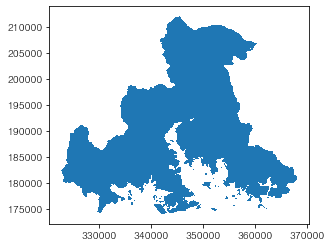

In [47]:
acc_cnt_cp.plot()

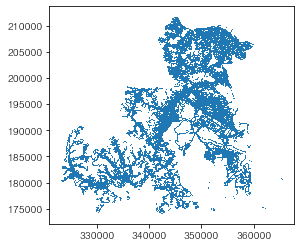

In [48]:
a.plot()

In [49]:
#a.to_file("4_3과A_15m의 겹치는부분을 가져온 창원시 그리드.geojson", driver='GeoJSON')

| 모든 그리드에 거리 넣는작업해야지

In [ ]:
#예전에 전통시장한적 있는데.. 그걸로 해볼까?
#a를 꺼내서 qgis로 돌릴까?

#일단 꺼냈고 이걸로 해보자

In [ ]:
#그전에 EPOD에 대해 다시 검토하자.
#그리드에 점수 하나만 넣는방법   (이것들이 y값이 되어줄꺼다)

In [ ]:
'''
full_data['acci_risk'] = (full_data.dead * 12) + (full_data.serious * 3) + full_data.minor + full_data.injury

full_data['acci_risk_ctc'] = (full_data.dead_ctc * 12) + (full_data.serious_ctc * 3) + full_data.minor_ctc + full_data.injury_ctc
full_data['acci_risk_cth'] = (full_data.dead_cth * 12) + (full_data.serious_cth * 3) + full_data.minor_cth + full_data.injury_cth
full_data['acci_risk_cal'] = (full_data.dead_cal * 12) + (full_data.serious_cal * 3) + full_data.minor_cal + full_data.injury_cal'''